In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import tensorflow
from tensorflow import keras
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, Activation, Flatten,Conv2D,MaxPooling2D,BatchNormalization,Dropout

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

cp: cannot stat 'kaggle.json': No such file or directory


In [ ]:
  !kaggle datasets download -d salader/dogs-vs-cats

Dataset URL: https://www.kaggle.com/datasets/salader/dogs-vs-cats
License(s): unknown
 99% 1.06G/1.06G [00:14<00:00, 127MB/s]
100% 1.06G/1.06G [00:14<00:00, 77.7MB/s]


In [ ]:
import zipfile
zip_ref = zipfile.ZipFile("/content/dogs-vs-cats.zip")
zip_ref.extractall("/content")
zip_ref.close()

In [ ]:
# using generator to form the batches of images to process each batch at a time inside ram

In [ ]:
train_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/train",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

validation_ds = keras.utils.image_dataset_from_directory(
    directory = "/content/test",
    labels = "inferred",
    label_mode = "int",
    batch_size = 32,
    image_size = (256,256)
)

Found 20000 files belonging to 2 classes.
Found 5000 files belonging to 2 classes.


In [ ]:
def process(image,label):
  image = tensorflow.cast(image/255. ,tensorflow.float32)
  return image,label

train_ds = train_ds.map(process)
validation_ds = validation_ds.map(process)

In [ ]:
## Creating a CNN model to classify the images

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation = "relu",input_shape = (256,256,3),padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),activation = "relu",padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),activation = "relu",padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │      11,520,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,619,345 (44.32 MB)

 Trainable params: 11,618,897 (44.32 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(train_ds,epochs=10,validation_data=validation_ds)

Epoch 1/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 68s 88ms/step - accuracy: 0.5470 - loss: 2.9644 - val_accuracy: 0.5608 - val_loss: 0.8825
Epoch 2/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 54s 87ms/step - accuracy: 0.6244 - loss: 0.6541 - val_accuracy: 0.6548 - val_loss: 0.6250
Epoch 3/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 53s 85ms/step - accuracy: 0.7017 - loss: 0.5652 - val_accuracy: 0.7466 - val_loss: 0.5270
Epoch 4/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 80s 82ms/step - accuracy: 0.7563 - loss: 0.5067 - val_accuracy: 0.7674 - val_loss: 0.4704
Epoch 5/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 52s 84ms/step - accuracy: 0.7871 - loss: 0.4458 - val_accuracy: 0.6916 - val_loss: 0.6524
Epoch 6/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 81s 82ms/step - accuracy: 0.8196 - loss: 0.4028 - val_accuracy: 0.6592 - val_loss: 0.6497
Epoch 7/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 85s 86ms/step - accuracy: 0.8368 - loss: 0.3672 - val_accuracy: 0.7880 - val_loss: 0.4552
Epoch 8/10
625/625 ━━━━━━━━━━━━━━━━━━━━ 79s 81ms/step - accuracy: 0.8609 - loss: 0.3032 - 

In [ ]:
## plotting the accuracy graph

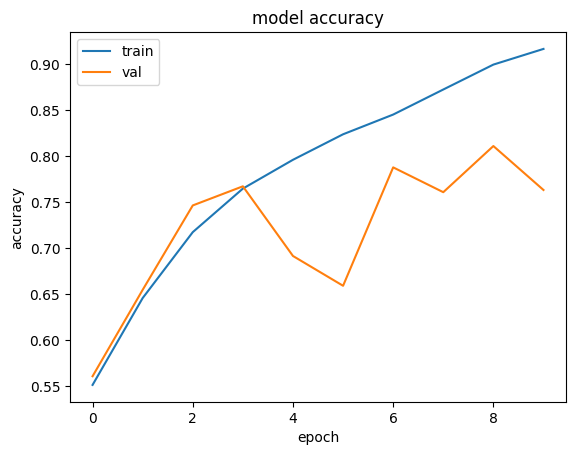

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

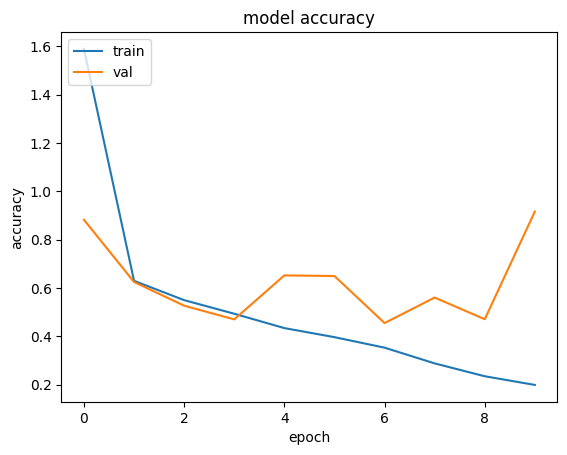

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()

In [ ]:
## making prediction on unseen data

In [ ]:
import cv2

In [ ]:
import urllib
import numpy as np

req = urllib.request.urlopen('data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTEhIWFRUVFRcYFRcXFxUXFRgXFRUXFxUXFxcYHSggGBolHRUXITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGyslHyUtLS0tLS0tLS0vLS8tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAL8BCAMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAFAQIDBAYABwj/xABBEAABAwIEAwYDBgIJBAMAAAABAAIRAyEEBRIxBkFREyJhcYGRobHBFDJCUtHwI+EHFTNicoKSosIWQ1PxNJOy/8QAGQEAAgMBAAAAAAAAAAAAAAAAAAECAwQF/8QAJxEAAgIBBAICAgIDAAAAAAAAAAECEQMEEiExQWETIlFxMkIFFYH/2gAMAwEAAhEDEQA/APTsfSpdo0tjUoKX9qUPGX1qeIBfBbyN0Roj+KUmSQRanhNYFIAkBXxAsULwzLmyL1HX2lNBPJvwUr4FQA4owrqlB7WCSWkD2WU/ou4cxGGc41mRMbGeS9K7/wCX4Jwa/pHsi0FEtMKRNpMjdPURiLoTkiAIagBsSFWbgqI5D2Vw0gUooBO2FFZtOmOXwTpYNm/BWOxHRd2Y6IthSI6V+SY5pYZ/DzViPJLHkkAIqaftAdb7qvhuq526IUzDj7YTP4dkcSQ2NAXR5p3ukKYhpCiNEdFNCRAEXYjoEKzzGmiGaWzqcBYTujKF5/Xcxgc1uo6hZJ9DXZepmQD1HRO903DucWguEGFIQmhDE0hPITSPJADCPJNIUh9EwnxQAw+a5K71XIAp4vNNdRrYS0ao7UhNzDLWMqNe036SlwdP+K4pyBBhieAmNT9SQCgJYSApZQB0LoSyulACLkpKz1TP2VS9tNw0tsTP3ifoqc2eOKNssxYpZHSC9XHtFhJ8tvdMw+ZMdzgrCY/ipjKposcHlol2kixvvefgoMTnzqR1QYt8pPmuY9dm3dG9aODienBLCxWH4mimyu1zXU3RrANh4+BWxw1cPa17dnAEeRXRwalZeOmYsuF4+fBJpXQuUWJqFrSQJI5LQUksLlXwWI1tBIIPMKtTqP7cj8MJWOge6oGYy5Peb9UfBQLOacYik7qYPqEeASQ2J6LpSoPmWf06NQU3NJtMgSB4H9Up5IwVyYQg5uohafJIhTOIKZVijmbXbFUrV4n5LXp8i8F1UsxbOlt7lWm1ZtfZQPGqoP7oWi01wU1TJ9KQtTyE0hMQwt8k0jyTyPJUMPVqOqGY0Cw6lFhRbjxTSFImlAEbh5rk4rkAea5BmtariQKmqBO/mt/gR33LC5JmINctLNLjMreZaLlAIJNCeAuaE8BACBKlXQgBEqWFxCAKOcVtNF556XQOZMGy8W4Xpl1eqxzyBqLulywfr8VvuOHvGKwwaCASC519OlpJcPYfELEAhuPphm1dst9+967BcnVTcptejp6aKjBP8hTK+DqAqdsWaS43gnvAXLvAH6rQY3B4eu00eZExBi20cgn4eoHMdUbU1CCyxgS0wQPIjZeX/wDVuP8AtPZMqsk1AG90aQ2RM+fuqsOGWZuUn0SyZVj4S7CGbZSzC4c0qcta6tpgkk3DpdflYei9e4TxfaYWlNnBgBHiAvNOLnzjqVJx7pBqE+Ugz6PWr4Tw9YVsQ4Min3A13I91tm+TYk+St08prIvfZHPGLxv0blcm0zYJy6xzCNzYuFXgdqD1EK6quLo7OFiEmMD8S1QKlG4nWLLQMNh5LL8S6SadXfS4A+8FaF73dmNJvAST5Y2uEWFkuNMFTdd5ZtzaNXo4d5axkwJ35qvjMvp1f7RmrwOyhmxucaRPDNQlbPKhmtKl3Wu9TJb6kmyt4PNgTLe6eg+6fEfotZm3BGEqtIFEU3EWeyQQfLYjwXkLWPoVX0XGHsfHh3XQVx8+kePlnTw6iOTo9nyvMQ5oV+hP3gJ1fJefZfiyNIJsQJWyp4yGi/LqtegyuX1bM2rxqP2QaITSPJA35mPzD3VnBVNY1TZdOjBZZxlYtsIkp9JsBV6HffPIK+fVRQ2RR5pI81IQkhMRHHguTiFyAPP8BRjETG8rbZaN1kcOCcTbaCtllzbFDQLovtTgFwCWEAQV6+lQHG/uFPiGSD5LB/a63bvaPug2UqFZtPt37hczFEmBKzjRURbJaTpOpFCstZ3gzWw76YjUR3Z6/uy8J4gqluLo02T2lEEuN7OcW2B/yk9LhfQ7V43xTlsY5lUWbUcb+AXP1W2MlL9o36W5JxEpNxTWPFNzQKxl83FJ0QSP8UC0G5nqs9hssbrL2txLKjRqd2jWdkC3vOvz8IAKM8bYQmiX0iQQIJBI943Q/h3BOp4Z1R7yZaYBJIkbn2G6zYs+3Hfk0TxJzKeFzZ+Ixx7RpJqN7sX03kN/wxIXpmVcQvw7jQeNbKZDDyIMCSB0krz3hqiGa8U+0zFtmtsPUyQPRWcsxdR7nVHtMveHtuYAe64jw+ihlm4/aHDROEFL6y5PXsqz2lUEghskiCYO9t+aNLxJ+Ic0lxkFrpkbEA9Frsq4gdVpjTUcPIkR/JTx/wCRcV91ftFWTQJ8wZv0qxTs5rD8bj4/yVDFZi5xu908u84T4TsVZ/sovqLK1oJeWg7xHTDAWx98yPMXVnD59SZ3XuIc0CbWBjZZOljS83dJHUHWPAX28fLzTMcQQN2/vcnmq5a+f9VRdHRR/sz0TB46nVE03h3kdp6qcheZYHFGm6W90i4cJPvFiEQHEOKeLO0OG40sII5EGJVsP8iq+659FU9A7+r49m5eF4X/AEgVmuxr303NcS4CGmTIAby5kiVoMZnFaqSH1NRF9M930bsq2XGlqnsW6r3DRrvvHRV5tUsnS4Rbi0zx8tlbIKrnAa+QvNufNbWu3tKQgxF7IXRw7RcAG/3WxA8IU+IxDWUQWyBraHDoCd/oqtPLbNMNRzBlTEZU78zlqsBNPDAc4ACYGtc0EXsrmAbqEcm/Nd7wcdFzBUdLALzzU5C5q4hQJjYSFOhIQgBhSriEqAMJkxa/FVS13dbYfVbXLtj5rzbg2kW1n35fVek5bslafKHVcF8JyaE5MRHVFj5LI0aQ7Z58Vr6mxWYpM/iO81LwRZeaxWsCQCVAArGCZJMpiLWIfDHEdF5fxVmLNDTosxzmybd894k+/Jem5gP4L46LzGnh61ZtdlNrOzDruMFwcQb6Ty687+3L1cXLLGPo6OmajjcjH5txCaobQaCQRJIbu1oJO2xOwHJV8Znb6lMUmNLQLTESP8O67H5eQ5zTSbrBOoMIMWsTF4mPQhVm6mHUAJk2BkAzA1Eb7Hb4yl8CS/RZ8zbCOMljKdFzjBbqeBBtIgH1bPr4o7lLA1g0mQIDZvAEyLneeZWYwGW1HVGl/wCYzMH4dNlqsoojtDTiW06j79b8h4LDqeVSZqw8W2OzKkadOR+eb2MEmUzKceBV03giTPU7Kfijv0Xx+Ez/ADCpYWiGuHUM39P5KpQvku3B+pjYMEi+xjfzHVVsTiwbc+oWaq5i43B5/wDsK5hWmr+KDvB+Kfx1yLdY+pj3E6bB3UEwf0Pv5JmHx14qPJB5CDB63VPNaTmaTveCfL+SqZjUIAcPcD4FWqKa4IXXYbOOh1iSPGyNYXGNIBgzsb2WHbVDtJBMx3hPt5habJagc0glwjlaD7hZskGi2Mkx+cZQK1TUx76bhcOtci4S4fDPYZcyXHdoJAJ56efon1Mc3WGNaLbl249kWzHAuLGvBmPNSjkfCISiuyDDVgdiYdaDu0/UK45zA3RVEh/LyIP6Kpg8OLvdYNEuPK26r43ECs4OYdrAeH/ta8CuVvpGHVTqO1dsPvz6kxmljOXRH8ixAfSDgN1562gTyW64VIFAAHZdyMk1wcuqDLQuK5q4pEhCkSwmucBclACEpVC3ENcSGmY3XJWFGB4UI7R/ot7ljgQvPuDDq1u8lvcn+7Khj/ihhUJyYE5WCGVNigdLCnUTIuUarjulYh9Wr2zmgnTKn4Is1IpeIVjBtg7oNSoOI+8VeymgWuMklKwL2YU3OpuDdyP3C82OMdh+0omWdo7vW221EWv3RHuV6mAsjxzgGPNMubv3SRvuFg1mN18ifRt0s1exrsxuf4Nusn87mg2uRIBJPSQLcyPBBG5c0do1wtoBpu2g859RPktHnuMYAXukBsW/vahELDYnHVMQ5zydLIjSPOfew9lz4SlJcm5pRLJzY2Yy7rd4ddLmn5g+i2HDmEhhJ3NyeZJ5+axmUUAXAxYFeg4GqCBH5fkqsxZBlHMmNAcJA1AjlueoO9/ms22vNVzdiAfTun9Ud4jmJjmgjKLX6agMmHNcfFhkT46XAeiMfCG+SrUw0OIBmRJB6+CJZZTAIn0P0KFitqqXtsiLan3fGfhv81NpsEy/jADPOfmDY+d/iVls8qmm2wuT79PXxRxuIloPiP5lBs6qhxuIgTbyMfH5qWJU+SOR2uCtllO7dRv0+JE+C2fYONLVRgO39v5WWQyymQ3USLiA39TCL0MaWjvGQVDPe60PHVFTCV3Go8PMG3Mdei9KwdQfZXOPJu3WPqvP6QY+oXEAyRBkyYMen76re4mifsbw0bsgHbeOapaTyJhkbUGY3FcRCoXteA2nJ7vy1Hmq+XYUlr39qGgcpQw0GsLnFnaEWcBcIPUxhcS27B8PJdJR44OJvd3I3VTHtkaHy3TBvsVdy3O+zdTpip3Se+enVec5fQf91ztEiQZ3UmLy/EU/4gMsAku2HorFJ3TYpTvpHuRxzZFSnWkRdvIwuo8Y0HTygwV4vkufRBLiYN+i1uAZg6lJxD9LnTN9yUp55Yxp7j0PBcR0ahLWvBN4QLOc8khmsEau9BvCweXVzhKwMahcG/I7JudYh1WXMhgbcevJWubkuyNnp3D9RgMgnvCbkbLl5bhM4rNqNnU5rWEWlcpRyuPFDo1fADpY49T9F6Nlbe6F5pwnWbQYWkra4LiOiGiSB6rRHoKZpQnIAeKsP+Ye6Q8WUPzBStBTDlQWKzop993mmu4yoQYcEHfxVSBJ5FPcqI7WaykICs4XdZBnGFIhPw/GVNpvzS3INrNu0rH53mT+0qs0h3Zta9g6wTqjyACz+Z8VVWVC6nUB1bNXZfntR9dgcJNQaXbbOt7CVlzyUoNIvxfWSYN4jNOuxrm7lwgTz5jzXnVKuW1nUnktaDcfRazEnsMS/V9wvNj+Eh24Q7ifLS6q6oyLCZAvpPz/AJrn4qXD8nSnYWwGkBobcFHMsqgaecxz58/msXkmMhmk7za0mfXZH8oxBc6AC3aPTf1VORUWRdh7MqYeHeAlZ7MaYo4elBhzn1JHnpg/Ae612HwutriXcvbn7LJcTgueGaY07jxPP2AUMfY5AGlc+s/v4e6krVnEho3/AF3+SkwmGM90EnkjmV5ISJfDfNX7qIEOT4NzuXr6KzXyNrj5CY8wpMdn9OhNNrS5zTB5CUEdndTUKjXRIgjl6+yI45S5E5pHMwWlxaBJBNugLjy9vir1fKnOpEGzokX9VVZjS6s2oBIeTqA6QPhYrS1ng/duW7fVVztMsXKAWGogADrF/bb2+K3GPgYCrciKZuPLdZTFBriCG6TNwPj+/BXuIc6bTy2s7q0sHO5sjHFuaK87WxmBxAdRgUnlwd94m9yq2Np1HNG0z7qPh/Ng5pY9wA5SiuYUmMp9p2k3FvBdD+LpnGceLE+2sdRIdTOuIDjyKgy7M5pGjVk2sOqo18XqLmAjTEhS4Om0Nl572wS2LpkANWYGagT3ZkAbhWOH8YHdwyHTZXMwy9saiY6jmq1J7GlpZJ8fFXWnHkapPk0+Ly95sT+GSRc2VDCG9qsiQYPOOSqYTO3nWHGJsD4I3lzsNS0uriS9vdjr6KmmuGSbV8FBnE1RpvSlskbclymzjMKLqRY0aHh3d8RylcpLHGXLQ+fAewDQ8kA8kbwmApupuk94T5oJkrC13oqLc+dQxDrS1xWpryWXQf8A6oJPdUpyssI1bbldgOIQe9pgKzmOYB7RyJFlGToaCeBy7Dvk6RtBU7OH8LFyIWNGKNBrialyguLzV7Ll5g8pTWT0Rkjf4ilhqTJ0ggWWQxOJpve40xLQbD6LMYjPiWlriY5C6uZLXhm/mFGbbIplivXEyRp6HyVTDZlU7UFrhLTIUOYYkAm2qeX6JuAp0xL9j47qKiFGy4pIrUmVtPeqsl0cnNs74g+6xzM2NNpa4SACBzseS1uV1+1wz6e5puaW/wCF8j4GfdZTNcGQXCNlhikpuLOkpOUFJEeAqanhzATF4A+MLVYBzrS2IHsRN1lsBhqjMK6qwi7hqPMNbv8AGPdaLhrFGrQ1EyQ9zST4R18wnlgtu7/gY8n32moysghzje33ZidrBTZgKD3jWQKkQQTeFTyZg1C48Rysspn+PH2qvUJ7ocWj/LZZ8OPfJktRl+NIO5jjqVNpFMz4t38pQXNeIXOpdkSGgn1josvXzoNPd5m6r4vMGVA6TEbLatPdVwcyeeUjZ8VYYPbRrsvrpNDyNi5gDT6wLoBTNoBsrHC2cithzhXEB7XaqRPMmxYT4gCPERzULsKQTCq2OLaZ0ITU4JhnJ8C5zA9t+9b3I+nxRHC1iHeEwT49D0KTL8YcPl+trdTnOcG+cEyhmQ5p2zHAnS+ZIO53/fooyg2rJLLFS2hnHvgtc3afl8kJ/pFzOm3D08NplxAqGN5Ngdttx7I1Up6qTu7tf2ufgCsVx7ji6rQ1WZ2Q0mBvMESN9hupaaKc0R1cmsfBncH9nbDnHvdEdoZ7h+yeCA9zhEHkFnsWykCA0ap3UVXCRZou4wFvlBS7s5qyPpIu5Jh+0rdznt4InmDjReKb4N5BCjwejCU5J/iu35+yB4x7qr5Lo6KFb5eiDjRpcU51YFtMGTsOqFsq9gwipdwMFvQo/wAMggBwdLxaVlc4Y52IcAdRc4yfgnCm9o5JVZHp7TU+YEwAiWX1dECsdUWB38lQpDsXgaZndT4jDagHTcu9lOSvjwRV2T4ppcTULbbH6JFA3FucAxsxPekLkdFlfg2uCzINdHM2SYzKi52onxQQ/fbBi60VJro+8rtoJkrKDgyAESwAbod2k6uXgh7XOHOVLTxZG7UnFMkmQVME1wuSXT8FQx+SF8Q6Ffe90yAkdiHJKCQ7A7OGQSA51leo5IA7uusrDmzzKmwrL/eKbiJFN2QgukOup3cOyJJVyq4cpTg90Rf2KWwC5wjkpZVdp2NN4cPDcfEBDeKMAQ91twD+/wB8kb4axRp1gXEw4Fu2+qybnRFW7d2uh3lK52qjtyJ+jdpncGjNY3LGNY3S6G6Jid5JJlEuG6I+zuOw7Uj/AGNVTMQO9q3uNo28FeyJ4GGAG/aOPyCu1MduGl6KsD3ZrD+TtAdYiIgjmEGzjhyjrdqgEkuMn8xmUfyOmC4G3VA+KxUFTvtMX0nqFm0P82XaumkZzG8NUJsWoNiMppNMCIRt3ixyrVGT/wBsrp8GGiizA0ANwD4LQiqys1tUES06KwG0kHS/1A9wUErYSdqZRfIqWlldhYRLWPHmxxBHtU+CozxuNl2F1ImzBrqVIsH3RFVnRzHd1w9C4LN4mnMPpu0vaQ4R1FwtPmDnNwoZGoF0Cd2giTB6d0e6y9Wi8fdZuq8MG42LUVvtHpOQkVKQdsHtBvcCQRB8rj0WYz3A0i2m2uA1zNTTPgUV4Sc44Yi4ILmgje0O/wCSD8RsfU7P8bgHgk+BAaf9p9lmwxaz0apy3Yb/ACA8Tl+HH3CFAKLGvBiVYfltUfgCruwVSbiF0WzDt8ljEtpuHUrN4vDj4o/SokIZi2b9ZU4NNEZoN5PQLWQ2QY3VZ2FGsuLZPVLh8bUaG8hCv0caT+EKFLdZLawZUoSZ0FWOxbH3SCi4cSNgoy88gFJpMAc3DNIjTHouVpxdzgLk6FwCKj4e3zWkwZJ2CzrW6nthaLDgjqrSuISpuI/CFIKhP4Qh+h52JS06dQbyUiQQLT0CQjwCoVKjxaCq4fUnmgAwMOY2CloYedoQxlSttCmb2wvCAoKdhp3ATn+QQh9St0UbsRWJiLoAP5dp7VmtsjUIA5mbT6pmaZRoc5zS6ZJjzPNFsBlf2Y06tV2uoN2yA1riIA2lxB+KsYvMWB7gQJb3jOxbzPp9FytVkU8iUf0b9PFxi2zHZu5rtZgefVWuEsBOHLnc6jizyAaDv4ghRZbkjsQ5xfU0UgYkAanE7NaD4XPT1WqyotaewYO5RY0HYm894nmTcmOZVmtypQ+Ndlemg3Le+gbh36aoaJHdJNt+fkTYoXn2IdUqSyNIG97nmY5Ilxa8U6jG6tJ0nY8iY+h+KzgfezrKekw7VvfbFqMu57UOHaG0hNfhqnULg+PxKQ1mkfeW0zEPZP21BGeHME4is5xkBgb6ucD8mn3VfJcHTq1Q19QMY0anEmLAgQPEyFoP6yw1IPoUiBOp8ElzpkNHmPLb1WbUzSi4rtl2GLck/Bn8/o6GNYDz26Dw90GrtNtOyL8R4sOLATdrBqA5OkggxzgNScO5QzEF2t5axsCxALnGSACbCzST5eKMX0xpsWX7ZHQa4Xwemk0G+sud6Huj/wDM+qE5rRLaxAfs0WtI3JB9SfcLXYNtMOhhnQ1oESQBJaAD+I93ZYTiSu04mo5r9TTpiPBoBHmCCsmmblmlJmjNSxqI51LV+P5KvUy/+8qFXFyIbYq1hcQIuVuZnRWrZeDs4rO4incjxWuc5h5rKZhYujkVPGV5Aj/VZOkk2hTtwHIEpuS40aRquYRCpUZyVbTbLVwit9li0lP+zAdVK5wHNMJaVZFMrk0RHCFx3K5TBrOqRTIAbB/2rZW0woH4Wlx8AStphOHsLSILMPSBHMt1O/1OkosyB/LZMS4MFhsLWcf/AI9T/QR81Zp5JXJ/siPMsH1W21eK5zgB+ygLMh/05XPJg83foCmt4RrTJqUx5aj9Atjr6T7JwQFmUbwk7nXb6Mn/AJKRvCY513ejQPmStSG9Qu8oCKHZm28KUeb6p9Wj/ipmcMYcGdBJ6l7voQjf7tCfr6fRAALH5GartTsRVEO1ANFIwQZEamE+G64ZC0yaj31Z/OGef4Gt/ZR0P8F2qefwUfjjd0S3y6sBVcisBTqOpBpJhgabuiTDmm9guwuSup6i2o7vGXd2lBMAT93f99Eb0+K63NJ44PtApyXTA9bJ2POqpSa90AangOMDa/RK3JaA/wCxS/0M/RFtSRt7i3pCkkkKwYMqof8Aho//AFs/ROGV0uVJn+lv6IiXXvdNPgUxFE5fS/8AGy9j3G/oo/6nof8AhpW2/hst8ESSi/JFBYLqZTRJk0qZPOWN39lVxXDmHqDSaLQAZhpcy8RPcIRyPD2XGEUFgKjw5QY7UGuabG1WteDInv3uefVI7hzC86I/3j4go9CYkopDtmd/6PwkyKRB/wAb/qUj+D8Py7QeRB+YK0aYQUbUKzLV+DKf4arh5tB+RCzmZf0d1jq7OtTM/mD2fIOXpRb+7prkKKQN2eXYbgnFU2juNfG+h7T84KhxeVVWHv03N/xNIHuvVyPD4p2tR+NEt55G/C+KgOHcPFep4vJqFT71IT1b3T/tifWUBxvB5uaNX/LUH/Jv6KSVEW7MW7DFciOZYHEUL1WED8wu3/ULD1XJgeqT0T2ensoe0+vmlkzumRJQU9ii7b9EwGSgCxK4VP3/ADUU8glA/kgY4PPJcalt05zQN02evogDibdEgd8P39U/fb98lFpPNAx5d+x8lzahTAOqWUATdolc5Qtb+/NOIgxCBEhqRuomX8Ol0hbHzul1Df8Af7sgBXD3TAl1jxXG/mgY9jlwITDulDUCoe0dEj3LmzzTTdADE17k9cQgLIgbwn9p4pgEp72/JACmEx48Vy6ECEAXaUkeCcQYlAEbmpJ5fzUoda6QsCAIXeK5Pc1cmB//2Q==')
arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
test_img = cv2.imdecode(arr, -1) # 'Load it as it is'

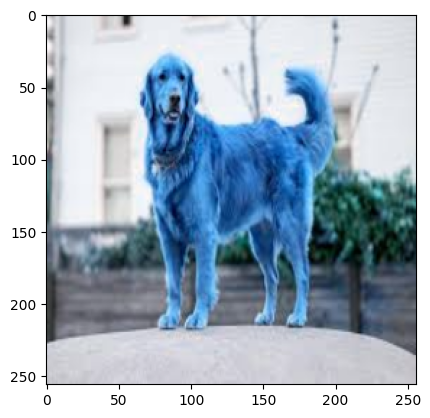

In [ ]:
plt.imshow(test_img)
plt.show()

In [ ]:
test_img.shape

(191, 264, 3)

In [ ]:
test_img = cv2.resize(test_img,(256,256))

In [ ]:
test_img.shape

(256, 256, 3)

In [ ]:
test_input = test_img.reshape(1,256,256,3)

In [ ]:
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step


array([[1.]], dtype=float32)

In [ ]:
## checking for cat

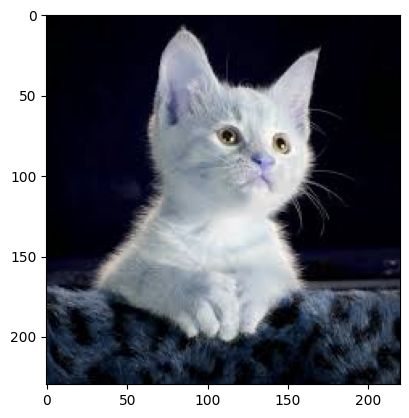

In [ ]:

img_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxITEhUSExIWFRUWFxgVFRYVFRcVFRcWFxUXFhcYFhYYHSggGBomGxcVIjEhJSkrLi4uFx8zODMtNyotLisBCgoKDg0OFxAQGC0dHx0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIAOYA3AMBIgACEQEDEQH/xAAcAAABBQEBAQAAAAAAAAAAAAAAAQIDBAUGBwj/xAA8EAABAwIEAwUHAwMEAQUAAAABAAIRAyEEEjFBBVFhBnGBkaEHEyIyscHwUtHhFELxI2JygjMVQ5KTwv/EABgBAAMBAQAAAAAAAAAAAAAAAAABAgME/8QAHxEBAQEBAAMBAAMBAAAAAAAAAAERAhIhMUEDMlFh/9oADAMBAAIRAxEAPwDw1KhCDgSoQkeETkgSoOBKkSpKgQhWMDg31XtpsaXOcYAHn9j5INGyi4gkAkC5PJRr2ns72So0aJp1Gl5e0CpeBJB07ua47tr2Gdh2ivQl9EwCNXsJ0DuY6p4mdOHToSlsISWakToSIBEQhCCIkSoTRhqEpQgsCAlQg8CQoKEChAQiEERCEIIoSpEqFhCEqRhCEqDAC9Y9mfZ33dL+oePjqfLOrWbeJ18l5lwjC+9r0qX66jGf/JwGy+kmYcMYGi1vJAQ02jQ6p78M1wLHCWOEOHS1+8fZRPEFTYareEvIry8E7acDOExT6X9tnM/4mY9QVgr2H2y8Kz0KWJa29N2Sof8AaR8JJ77D/kvHoTVz8BSJ9UfERyMeVk1ANhIQnppQCJITgF6H2A7Be+AxGJaRSIljNHP0IceTfqhLicBwWvWIFOm503mLRznko+J4B1B/u3xnABcBtNwO+I819H0cM2kA2mxrW2EAD15r537R4wVsVXqgQH1HEDpNvRNLNQhCDCQpU1BUqEJUCEQkTkFAhCUBJQQlISIUUJUBKg3QdgGA8Qw4P6ifJjiPovoHHVLjuC8Q9leFzYzOf/baTpubeG69a4liflM7wfqlozalqOUdNxmyjbVFpK0nsaGwPinQi/5+aKZNVbiSrhW16T6FTSo0tPiLHwML5z43werhqr6NQQ5hIPWLSOhvC+icJWnIep8gAfuqfabszRxZZXcPjDcruoE+tx5Koz3K+dMSPjd/yP1Kihem8U9mlZ9QmlGUvBkmLOPxa7gqLH+yzFNLssOb/blcBbNGh1MQfA9E8V5R5uUBsrpj2KxInMwhwcRBESBv9PNdb2J9nZdUz15DWnTnGvnbzQWxR9m/YU1iMTiGxSF2MI/8h5n/AGj1XsNKl0/ZT+4DQGtAAAAAFgANAApDYITrC7S4n3OHrVv0U3uHeGnL6wvmlx5L3z2vYkswDgDGdzWkjkTJHovAUwEJAlQAmpSkQm0soSIQWlhKhKhcIlQEJGcCkIShAQoqEJwCSsd97N2ZGPfuXtABHLrrF12/aCqAwXva28m/0XOez/AObRYXNIl7nCYgwNuiu9rJzhwPePul16Li7018G+WA9FdbWcKYc0n4fp+DXosnhbv9MAbif8q/gnOZLXDQ2PMH9iR6oh91rNxAy5haRPjG35urdLEwI217uf2WPRqgSItMjv3Hd8qnp1LxFryOkRb08krWcbDK4gc9PX+VosMtv4Lmsc1zWseDLY8yBv4x5LfwV2Nc02P59k5am4d7hrrPaDyJ1Tjh8mml/VNe4hw6wrzRIJKel8UjzUWeSbmB0VmtTt4LNxD4+Fu/iSqipNec+3LiUUqNEf3lzz3NgAdLn0Xja9R9tPu/fUScxIZlgOjLcn9JH+Oi80IpnQub3gOHmIPoUUp8QIUlSkRexHMXHjy8VGgApEIQmhCEJkcEqAhS1gSgIAShCgAlQhBhWsDRzva3mQPMqsFc4a6KjHaw4GAQN+qR/j2yiA33TRowRt/+bLN45gn1rMieu35dW6LwQ0gQIFtfVXGJd+6x4uKHC8MaTAwmSN9pV6m0nrt1TKikZicthdSvdOcwzBGtuXqtCi+nSbNUzyuAeduaZw2oHuhxj85rF9ofAqzWubhzAq5YOaBA+Zubbn1lacc6z76x0mH4vg6wNHNldYDNpOwkaHvjVbJaKLGsGgiO5eD4CjVpYRtepUu6rkp03SKrWiM2YEfIZt3SvVeCcV99hpefiaADOpGxT65xPN8psdY34iPD6K+aZDTAWLwmtMA7j6K12n4z/TUPeC0mM2uUAFxMbm0eKOedHVxZq09lh8SJabNm19gB1Ky+xnbdmNLgKjiQbte0NMHQiNvFdTjsLmCLzYrnp5B7aMG139O+4Ja64vygRvvaQb2B0XkdWmWmD6aHuXqntxx3xUKAI+EFzucnT0C8sNQkQb8idR48kU+fhjSRcWSOKCEIM1CckQmwiEqEEUJUgTkmkCVIE5CgEFAQhRQp8IfiGnjp6qupKToM6JB6/wBn6k0WGQbbRHotX3lly3ZHGPdTh22hiPsum7kumP6bUqeqt4SjadVVp0hM6q6MU1o/lSq/8T0qd5B8Ft0cQ1zPd1QHNOzrrmW40HbyMqVr3OIBaSO4z4H8CJf8Kz17ScT4Rhb5KAc/YyXAFZWAovY7M4GTEjSNY79vzXomPeB8MNJsM2s9R53Stwwe3K90yCMxBBuIEnSfm5bK/qZMLw3iDS6AZMz5/RbPGcEMTRDdRex6iCD5z4Lj8Hwqvha4Jy1KRn4jIeDEtECxXXcLqPNRpDYb/cZ1Hcjnu61/k/gnhsvpyHCuyhwmSnTok1MzgKjWEFzHPa7/AFanynLEDv7yvS6jYAvsJ790zNM5SVGN1p11rm558Y8p9s3AM4NZrbgAzMadBcrxQtgSdToOnNfQPtXxkUyP9M20e8g+DQDK+fapkkkz1vfzS6acfDChCFKiFCVCZEKROhNKAcnBNTmJKh0JQEFK0pNDYToQpWwUGZkTVepNCgrMAd0QHQ9lMS5u8CeVz3X9YXpWHdmaNrbLzzsy+m6A5sO5jKLeOi9BwrIAjl3orHr6n9xysk/p1cotTnUOSjDlU8Pmm4juV4N5mEU2QpTTkIhdJMI60C3K1ytAnIJk3m884/lZTCWaE7eH5fzWhRp+8AL35jsNh4K5ShMXiz7snKXi3gAbwN1pcMxIc2WkQeX7qzQwAEQbQqdLh/u6rso+E3EaTv8AnVVi73LzjUw+8o9+A0pFzna3HtZTyZozWMCT5AzHUJsXlntR4uTULbgzo9gII3jUctV52cSeTP8A62D6BdN2hxtdr3AVH2uWvh7Ht3cwOkW3A5zzWEHUqti0UnnQtn3ZOwLblveJ7t0qufFY1WnVg/6ktPrI9ExzAflPgbH9iitRLdfAi4I5gjVRpGUhIlLkiAEiVIUypUoTZSpHKeUApqUIXp0pwcmyhBphXKs4ei5xDixxbMSBI7r69yr4RgLgDdekdlODGQW5TNjD7x1BZ6SESaXXWLvZrg9IgOtGsRIBHjLStZz/AIraclsVqLWNyMAmNt1lf0b55I7/AMZc+/a9hqqusVPCUDodVpU6BWaiGn4IbRKvUsNZXKGBVSFaxjh5Vvh+EIK2WYHopmYWFXinRSMJzngJMq5ftZ2gdQa4NBBAtbX0VaWHdrO1VPCsJJk7ReO8C/ovFO1HaCrWb71r/hJIIBtfUeBjXZ7Oqze0HaeriHODwInuPjeD5BZmAqSyrTOhYXj/AJM+Ix3gSeeQckl5h+C4gY9242mWSYynkD/b0OxPIuBr46jldLdDcWiDuI2IO311VRX6Ts7cpNyYk/qiGnxhre4EoGq7a+oIlpMlvXmOR6/ZRvbHdsUwJUAIQkQZUJCiUERKE1KhMpyVIhJppyAmqzgcK6o4NaJP5zQetjsrQLqlmyNwdPpbvXs/CKDWMkDK6IgGR4X9VzvY/s65jZewad56m4IHhC6iqBEcuqr4y6u06izMdJ6iZHetHDYX9Qkc9ws7DS0gwVv4TEBwg+oUfR8No4BvUfnNOrhjOpVl1Mi4MjeEMa0m7fJJSLBsLjJEcgVsU2QoqMC6sNNpVRNStTHoDgo61WEWgFoVHjHDqVem5tRoNpBNvUKU1CdFNQGxRzfYs9PnHt/whlFxLGPcNA6MrB4mc3hHeuKwjocTsA4H/sC37r2/2ocCqBrqjSCBPNsA9fiHmF4bWJkg87qqfN9IyFKG/AT/ALgB4Az9R5qJKXGANhoO/X7eSQIEJEqAEIKRAKkSohAIAlAU4AUjWdEtXP45/qrlShquBvRTUKBcQGgk9AjVeMV8BgXVXBotPOV6p2L7JPpAF4a4G+aAe6YIP17yjsV2XZDXvHWCNxvIXb4qs2k3K2AFcmTax6625DatRtMQ23coqZD7nVZVWrJN/X8lIcSQZn+e/qs70Jy3aFGFfpsvrdYOE4iRf0IP7LSbxcf3N8tUvR5W9RqkCLFT5RFtFjYbHNOhjoVbbXvYgc+SYaBkQnPrWVL+tB8LIfjRF0YNWYdzsp2MG6xxxEfLKkGPS9D218wCVlRZ7cRKc2unpYOPYL3lMwdRF9O5fOHbHs4aFZxJDZJOX4pudRaAPFfSoqyCJ18F497TOHvcXG4g6nKGDqTmA81p9g5uV5P/AE6PcIrOIMB09Rp4KMVjCiStb1J+JPchHuQmCqnCohUspRSCX3QSAhOc9JWAUxySGmOSuYOtEH3YeBqCLHxUzakycobJsOQQWEpYeLxCWw10PJdRgK+FeYyZSRcQCPL7qTGdkMO8ZqTyy17kiZ6zCWpce5xMwbDRa/AaTnuFhbW8euisjsZsagBtDmmx72/sVscI7Pe5v7yT5+QOiflC9uzwmK91SA/uPd9lTr40neVgY/iNRvzC23glwfG6ZIkxsZjX9kXvWfhY2HVjsocwc6+3kpTlIkEeCbh2ayppyp6TY2/fzVkmQoRa8p2eBbdI4t062VSDFydYCz6jrW2/J/OaiptcTyKSnU8LqXklbbwxzbgH6rluD0nZhMx5rqG0pFjBV81PUV8RgGNGcAW81DRaHK7xAxSOYA8/DcclTwcuGaIB26Ioi5TCe6mkapfeAaokK1Vc4hcn7QeH1a9L/TyzBBkunwyiV0HE8WGixHTvXKYntUx009LwTyO0HvVTqQvG14vi+BYhriDT8j+5+qh/9Ir/AKD6L1HGYTM6QdbiGiI7xAUdLg4Ny+ARyGu10vOK8K8zHB6/6PVPHBq/6R5rtMbwx7XR79gBu2WnfQW6pmGwYJObEAgfpF/unujxxx44LX5DzTxwStvHmu2r9nyRmp4qRY3YLjvBWZV4XVYZdUzN6WPklp4wW8PxABaHAApn/pNX9Q9V07+FhwBFc8j8MfnNVa2ByHLmqO6wN+4p6FPBUDnDm1BmBkTHlYkeK3qnEwwj3kjY5ZiSO48uS4ulW93Uc0i1wRu07OaeYWrxCq97LwYEgjWI06j/ACpv0R0DeLUCTJBi06HxE+q0KfEA8Wg7XJHhOq8uwmKLHSPz7LqeHcXcRF2mLZbHTcH/AAp65xXPWtnjYzMOUw6Jyzr3LhzxJzSQRvedV1FXFgguMO6QQ4T0NoXKcVINQkCByRzhdul4F2qa0ZXyBtN/ULrsJxuk/wCWo09x0Xl9DCtcLAzyUAD2m0hV6Rn69nZXBuCCE5r5leZYHtRUpwHXA08te/8AZdNwTtI2oYdbrtr+wRha6jPH53K7gbnTlHndLgMM17dQZUuBp+7qgH5dj1IgJYrW6/BkM94yQ4XI5hScM4gH9426c1dwlcEen2/O5YeFwjqeJLY+G5Ydi03jwP0TLddK1uax0IWYK5LsrRAG/ktOoPC2qycG4EmI1unRy0Qwwub7R8cZRzBzgDHl1W9xnibMPRNR2oBgbk+G2l1869suOVK7yXWk6i89CdCB4J4WtjivbAueSH7iIJgAH88ll8Lx39RXJJyydBIOwEbctP5XJl09/wCbLW4BIeDNto181NnjLVzrysj1TDVIZLZMAEzyG8npYqQ1QWEwB+ob2tPmuapcULHNc1w3kOFpKmp49zsw+UkG23gsfrX4wuK48ip81gYg3kcvr5KaiGF7TuQTLTBB1bp3nzWVj6LnHMItrrJJ3jvnTkOqm4Ex+Y5zsO8Tt6LW+p6Zz3fbpGVCJkAWkkbibyqeI4hDw0G9p8rq3Tp5wW87COuY/RcVXqFtWxmCL3iRr3qeZqurjrXOEW5+U9EyJ3KgwzpaST/aJ8yQfosqpxiCQHHXXWUpp3FbG4bMQ8dzo593UFONGWSBEdTHiom4nK/Kd4t12WlmIuNDv+6dtLJXLYgGbiNltcHxPwqtjsC9xzC/TcfxdLgMI4Hl3mxv0V9WWIks6ab8ebkCOYMA+KwMVmLi7Xu2710Bp31nee/89Vn8SwjfnDtNuZ6KeL7V3PQwNUH7q7iaQyZhcTfppE8lU4O0G8G2tpjqtStSEwDINx/n7JX6c+ObxwGydw6oWmb9PupRTzVIaQNbESDbkVtYTh7ctxBGu0ToR0VW5ESbW12U7TZHZajvmdY8pi30XpHHK1NuHNXMAWib7yF4Diw73gDbGYG15jwW9gMXWe8iq9zhBb8RNh8Ogmw+HTkAn+e0579PXeBccZVjKe+dRrr5LWrcTbUrZaZ/8YAJGhLoJAO8D6rxPB8SLJyuLSTFjawkx0075WjgO0VXD1M9J2fMbh15vfxhHkPGvZ8djclEuP8AaJuVzfAO0OGIBLxqLkEAEiRJ2MLzftL24xGIGSMrQJLW6a7nUrmsHi33lxE67T170W4OZbXp/brtK11YQ4OptADY9de/UfwvOuNtbVJeRBOkaeSo4vikiBfv+3L+FTHEnje+3Tollt1W8yY0qWBZTbmILidiN0gcQTAiOQsAdlUpcRJMESpK9eAXA66Tqpsv6qWfYnx+P+CND991NwjGnKBGaJtEkCDbu3WGxxe6ZW9w+k1pDhAIEg7EjbvKqzJiZdutfAOa5pEAySNLiPi16G3ikxpLKbnN3sCOcgkehWZT4kz3gLQRJkNi4J1bHetI4ljwRlkCTHMfyDE9ApUzaPGHBmVt3GACOYJ05ajzWfSoOe4ki939LarS4Vw0lxa4gb9L9eo+hWkyi2k0iPlESeRj7R6qtn4nN+m17U+uQDxAA+y4ar8x711pxoIIHLc6iYkc+Sy63DQ45s8Tr3o4ufR3N+I+MUoc2oNDzvBCt0OJjR031I/NQmseHNhwkHXp1VTEYM0zmBljtCNvTuulMsynZZdjboU3H4pkc4i2xIT3yLOiDed/Sygwz4ZqYifwhY+Nx94aLeKUm1W5GlisZlMAyDt+brOdh3vn4oHj5KJlew5/mqt4WqYIjUHzF0fC+quGwlQOtE+R/wCs7rYptcYBvyNxf/cBod/AqOjUjadyY2/PomP4mA4kARrvadI35I20ZIkwdNgfOW/I/Y7LRpAk5fmB8wBfbXf06rIxj3PALddfuquExNRtXMZ1108vKEZp7I6Crg2MOaPiHMawbEHexVap8zr7R6D1S8UrF9NsGHbjoLE+o8lhM4g4OIO1r+V0SWlbI0cY2AA3YR4kj88FWw+Jg5S4iNU5mMaRc6XWbh/jqd5JTk9Fb7ajq1tNdUlOpOkTp4pcWIYQLXuVkB5Bi8fbVE50+usJXpkE5tZNk/CCT+dy06bWvZ8W9r68hCoNo5XHlpKry2I8fZj6UGx13Tqrpt6pcQRzvCqB15Tk0Wyelql8LSVawGMmWutIt/hVm3tzEJBhzoD1v9kvV+n7nxdbw7M+x+byzWMePPmPFaXDKUOIdd183hr+6r8McQIfEaE/p5HuVzGYtrHXuYs4G/UdYPmptt9HJ+tSnAIdvcW238rrK4/Vflc6bOgHl4qm7jIAI57W1/YqClxDOx1Ij5vqPwonNnsWy+lHDUySYIkaa3TKlZ4N9Veo4F4+IGY9L/xqtGvSbYuiSPuR9lVqZKp1auUkDYqTD15BA01g/ljdCFnPjWoX4giT52CzsaZOb9Xd+yEK+frPr4gAV3h7ydUIV9fE8/V5oIbP5rCz+IsiDzQhZ8fV9/1WcDjCGt5zE8loCmMkG5B18UIR19HPxXdiNALbfdUcRh9TzKEJbh5qqKM2n8/Cr+Cw415IQq6tLmQ/ibwGQBvbpusumJPehCfP9U9f2aTfhAgnlqq2Iqb31IQhTz7XfSq8XStbZKhaIk9k94ZVmliOiEIsmFLdaVAujaAJ8OSysa+Xfz3IQo5+q6+JDhQQDJvH+VNgcMSbkWEeAQhVpSe26a4EW1An7rDx2LcHkWMcwhCnk6//2Q=="
req = urllib.request.urlopen(img_url)
arr = np.asarray(bytearray(req.read()),dtype=np.uint8)
test_img_cat = cv2.imdecode(arr,-1)

plt.imshow(test_img_cat)
plt.show()

In [ ]:
test_img_cat.shape

(230, 220, 3)

In [ ]:
test_img_cat = cv2.resize(test_img_cat,(256,256))

In [ ]:
test_img_cat.shape

(256, 256, 3)

In [ ]:
test_input = test_img_cat.reshape(1,256,256,3)
model.predict(test_input)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 27ms/step


array([[0.]], dtype=float32)

In [ ]:
## performing Data Augmentation in order to generate more data

In [ ]:
# Augmented configurations for training
from tensorflow.keras.preprocessing.image import ImageDataGenerator
train_datagen = ImageDataGenerator(
        rescale=1./255,
        shear_range=0.2,
        zoom_range=0.2,
        horizontal_flip=True)

# Augmented Configuration for testing

test_datagen = ImageDataGenerator(rescale=1./25)


train_generator = train_datagen.flow_from_directory(
        '/content/train',
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary')

validation_generator = test_datagen.flow_from_directory(
        '/content/test',
        target_size=(256, 256),
        batch_size=32,
        class_mode='binary')

Found 20000 images belonging to 2 classes.
Found 5000 images belonging to 2 classes.


In [ ]:
#making the same model again

In [ ]:
model = Sequential()

model.add(Conv2D(32,kernel_size=(3,3),activation = "relu",input_shape = (256,256,3),padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(64,kernel_size=(3,3),activation = "relu",padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Conv2D(128,kernel_size=(3,3),activation = "relu",padding='valid'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2,2),strides=2,padding='valid'))

model.add(Flatten())

model.add(Dense(100,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(50,activation='relu'))
model.add(Dropout(0.2))
model.add(Dense(1,activation='sigmoid'))

model.summary()

/usr/local/lib/python3.10/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                      │ (None, 254, 254, 32)        │             896 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 254, 254, 32)        │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d (MaxPooling2D)         │ (None, 127, 127, 32)        │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_1 (Conv2D)                    │ (None, 125, 125, 64)        │          18,496 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_1                │ (None, 125, 125, 64)        │             256 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_1 (MaxPooling2D)       │ (None, 62, 62, 64)          │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ conv2d_2 (Conv2D)                    │ (None, 60, 60, 128)         │          73,856 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization_2                │ (None, 60, 60, 128)         │             512 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ max_pooling2d_2 (MaxPooling2D)       │ (None, 30, 30, 128)         │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ flatten (Flatten)                    │ (None, 115200)              │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense (Dense)                        │ (None, 100)                 │      11,520,100 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout (Dropout)                    │ (None, 100)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_1 (Dense)                      │ (None, 50)                  │           5,050 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout_1 (Dropout)                  │ (None, 50)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dense_2 (Dense)                      │ (None, 1)                   │              51 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 11,619,345 (44.32 MB)

 Trainable params: 11,618,897 (44.32 MB)

 Non-trainable params: 448 (1.75 KB)

In [ ]:
model.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

history = model.fit(
        train_generator,
        steps_per_epoch=20000 // 32,
        epochs=10,
        validation_data=validation_generator,
        validation_steps=5000 // 32)

Epoch 1/10


/usr/local/lib/python3.10/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


101/625 ━━━━━━━━━━━━━━━━━━━━ 1:08:14 8s/step - accuracy: 0.5370 - loss: 6.0538

KeyboardInterrupt: 